# Trabajo Práctico 2: Análisis con Arboles de Decision

## Configuraciones iniciales


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

import graphviz
import dtreeviz.trees as dtreeviz
import ipywidgets as widgets
from IPython.display import SVG, display
from ipywidgets import Button, IntSlider, interactive

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

RANDOM_STATE = 19 * 103785

In [2]:
from preprocesamiento import obtenerDFHoldout, obtenerDFTraining
from preprocesamiento import preprocesar_data_frame

## Arboles de decision

#### Explicacion re fachera

Recall: 0.5335743801652892
Precision: 0.6621794871794872
Acc: 0.824151500245942
Roc: 0.8707759838392138


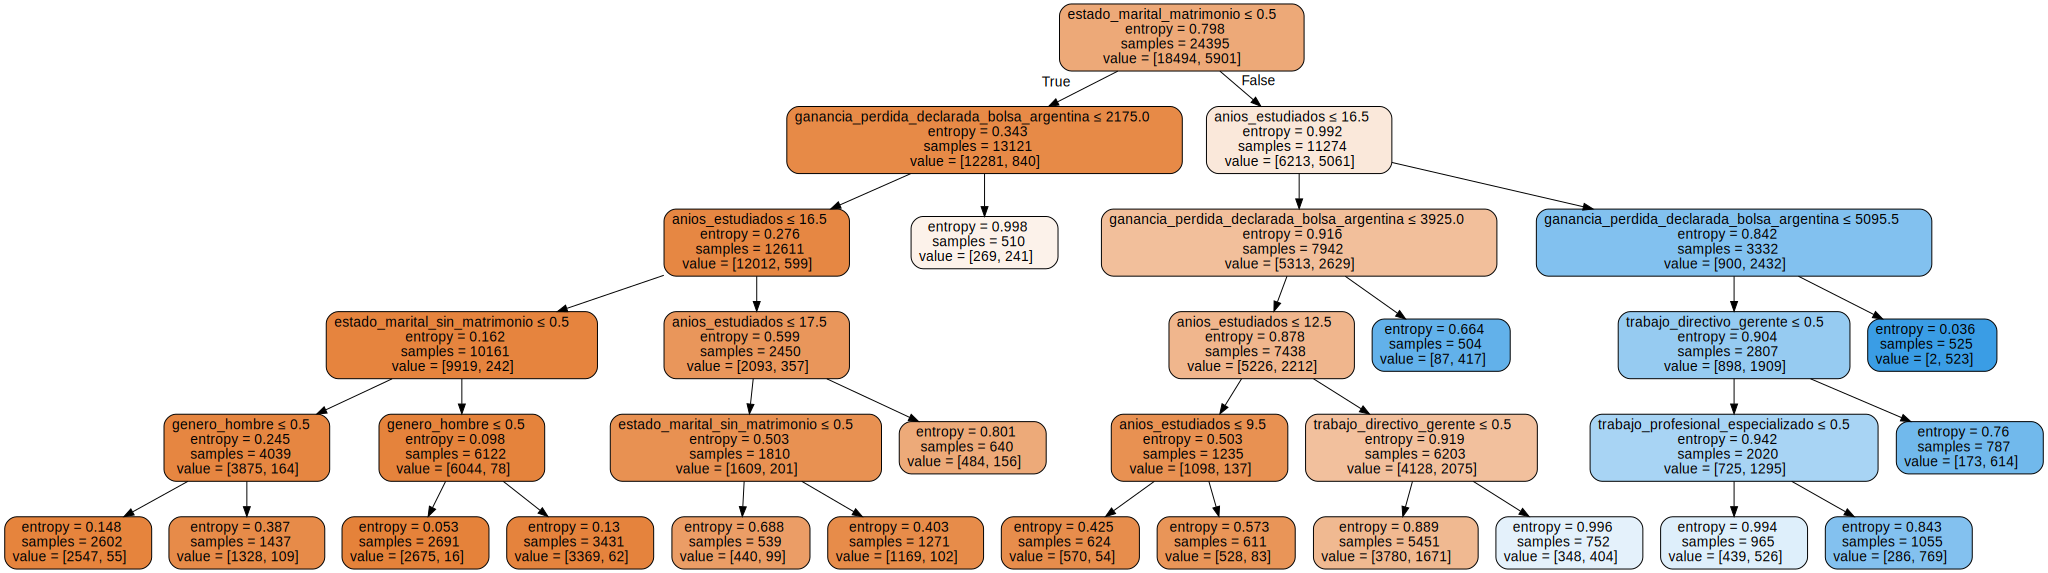

In [3]:
def get_tree(X, y, max_depth=5, min_samples_leaf=10):
    """Devuelve un árbol entrenado."""
    clf = tree.DecisionTreeClassifier(
        random_state=117, max_depth=max_depth, min_samples_leaf=min_samples_leaf, criterion ="entropy" 
    )
    clf.fit(X, y)
    
    return clf


def plot_tree(max_depth, min_samples_leaf):
    """Interfaz interactiva para visualizar un árbol entrenado."""
    df = obtenerDFTraining()
    (X, y) = preprocesar_data_frame(df)

    X1 = pd.get_dummies(X[['ganancia_perdida_declarada_bolsa_argentina','trabajo',
                       'estado_marital','genero',"anios_estudiados"]])

    X1 = X1.drop(['trabajo_No contesto'],axis = 1)
    X1 = X1.drop(['genero_mujer'],axis = 1)
    X1 = X1.drop(['estado_marital_divorciado'],axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=RANDOM_STATE)
    X = X_train
    y = y_train
    clf = get_tree(X, y, max_depth, min_samples_leaf)
    
    y_pred = clf.predict(X_test)
    print("Recall: {}".format(recall_score(y_test, y_pred)))
    print("Precision: {}".format(precision_score(y_test, y_pred)))
    print("Acc: {}".format(accuracy_score(y_test, y_pred)))
    print("Roc: {}".format(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])))
    
    dot_data = tree.export_graphviz(
        clf,
        out_file=None,
        feature_names=X.columns,
        filled=True,
        rounded=True,
        special_characters=True,
    )
    graph = graphviz.Source(dot_data)
    display(SVG(graph.pipe(format='svg')))


inter = interactive(
    plot_tree,
    max_depth=IntSlider(min=5, max=150),
    min_samples_leaf=IntSlider(min=500, max=1000, value=10),
)
display(inter)



In [5]:
parametros = {'criterion' : ('gini','entropy') , 'max_depth':range(2,10), 
              'min_samples_leaf':(500,1000,1500,2000,2500,3000,3500,4000,4500,5000), 
              'random_state':[RANDOM_STATE]} 

arbol = tree.DecisionTreeClassifier()
clf = GridSearchCV(arbol, parametros)

#Prepros
df = obtenerDFTraining()
(X, y) = preprocesar_data_frame(df)
X1 = pd.get_dummies(X[['ganancia_perdida_declarada_bolsa_argentina','trabajo',
                       'estado_marital','genero',"anios_estudiados"]])

X1 = X1.drop(['trabajo_No contesto'],axis = 1)
X1 = X1.drop(['genero_mujer'],axis = 1)
X1 = X1.drop(['estado_marital_divorciado'],axis = 1)
#Prepros


X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=RANDOM_STATE)


clf.fit(X_train, y_train)
print(classification_report(y_test,clf.predict(X_test)))
clf.best_params_

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      6196
           1       0.66      0.53      0.59      1936

    accuracy                           0.82      8132
   macro avg       0.76      0.72      0.74      8132
weighted avg       0.81      0.82      0.82      8132



{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 500,
 'random_state': 1971915}

In [6]:
y_pred = clf.predict(X_test)
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Acc: {}".format(accuracy_score(y_test, y_pred)))
print("Roc: {}".format(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])))

Recall: 0.5335743801652892
Precision: 0.6621794871794872
Acc: 0.824151500245942
Roc: 0.8707759838392138


In [ ]:
clf.best_params_

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from preprocesamiento import feature_engineering

def preprocesar_df_min_max_scaler(X : pd.DataFrame):
    X = pd.get_dummies(X)
    scaler = MinMaxScaler()
    scaler.fit(X)
    return scaler.transform(X)

def preprocesar_df_pca(df , dim):
    #df = feature_engineering(df)
    (X, Y) = preprocesar_data_frame(df)
    X = preprocesar_df_min_max_scaler(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=RANDOM_STATE)
    
    pca = PCA(dim)
    x_train_pca = pd.DataFrame(pca.fit_transform(x_train))
    x_test_pca = pca.transform(x_test)
    
    return (x_train_pca,x_test_pca,y_train,y_test)

df = obtenerDFTraining()

parametros = {'criterion' : ('gini','entropy') , 'max_depth':range(2,10), 
              'min_samples_leaf':(100,200,300,500,1000,1500,2000,2500,3000,3500,4000,4500,5000), 
              'random_state':[RANDOM_STATE]} 

arbol = tree.DecisionTreeClassifier()
clf = GridSearchCV(arbol, parametros)

x_train, x_test, y_train, y_test  = preprocesar_df_pca(df,48)

clf.fit(X_train, y_train)
print(classification_report(y_test,clf.predict(X_test)))
clf.best_params_

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6196
           1       0.74      0.54      0.62      1936

    accuracy                           0.85      8132
   macro avg       0.80      0.74      0.76      8132
weighted avg       0.84      0.85      0.84      8132



{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 100,
 'random_state': 1971915}